n개 ㅁ나ㅡㅁ의 덩이로 마드렜따

개졸리다

카이제곱이나 그런것들
특히나 pmi는 언어,어
다야한 패턴을 찾을 수 있다.



In [2]:
# !pip install nltk

In [71]:
import nltk
# nltk.download('punkt')
# nltk.download('brown')
# nltk.download('gutenberg')
# nltk.download('tagsets')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dlel2\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [2]:
from nltk.corpus import brown, gutenberg
from nltk.tokenize import sent_tokenize
from string import punctuation

In [3]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
corpus_1 = brown.open(brown.fileids()[0]).read()

In [5]:
corpus_2 = gutenberg.open(gutenberg.fileids()[0]).read()

In [6]:
len(corpus_2), len(set(corpus_2))

(887071, 77)

In [7]:
# 담화(문서) 분석 -> 문단 -> 문장 -> 절 -> 구 -> 어절(단어) -> token
# 문장 -> 어절 -> token

In [8]:
from nltk.tokenize import sent_tokenize
len(corpus_2.splitlines()), len(sent_tokenize(corpus_2))

(16823, 7493)

In [9]:
# ? . + whitespace 로 끝나면 문장
# 띄어쓰기 x, 줄임표 x

In [10]:
from nltk.tokenize import word_tokenize, TweetTokenizer, regexp_tokenize

In [11]:
len(corpus_2.split()), len(word_tokenize(corpus_2))

(158167, 191785)

In [12]:
from nltk.tokenize import treebank
len(treebank.TreebankWordTokenizer().tokenize(corpus_2))

185326

In [20]:
from nltk.tag import pos_tag
from nltk.help import upenn_tagset, brown_tagset

In [ ]:
# Treebank -> pennTreebank 라고도 부른다

In [19]:
upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [32]:
len(treebank.TreebankWordTokenizer().tokenize(corpus_2)),\
len(set(treebank.TreebankWordTokenizer().tokenize(corpus_2)))

(185326, 9852)

In [31]:
# 문자+숫자+_
len(regexp_tokenize(corpus_2, '\w+')),\
len(set(regexp_tokenize(corpus_2, '\w+')))

(161983, 7723)

In [30]:
len(regexp_tokenize(corpus_2, '([A-Z]\w+)')),\
len(set(regexp_tokenize(corpus_2, '([A-Z]\w+)')))

(15270, 753)

In [29]:
len(regexp_tokenize(corpus_2, '[a-zA-Z\'-]+')),\
len(set(regexp_tokenize(corpus_2, '[a-zA-Z\'-]+')))

(159946, 9317)

In [28]:
len(TweetTokenizer().tokenize(corpus_2)),\
len(set(TweetTokenizer().tokenize(corpus_2)))
# => 감정상태 분석할 때 사용 :), :(, =) 이모지

(193228, 8938)

In [33]:
set(TweetTokenizer().tokenize(corpus_2)) - set(word_tokenize(corpus_2))

{'note--no',
 'ill--that',
 'perhaps--when',
 'fancy--I',
 'doing--whether',
 'it--and',
 'it--I',
 'papa--that',
 'mistaken--and',
 "Larkins's",
 'business--but',
 'it--there',
 "writing-master's",
 'out--a',
 'something--Offices',
 'her--that',
 "an't",
 'satisfied--Our',
 'wise--but',
 'manners--and',
 'glances',
 'heart--such',
 'ten--for',
 'face--her',
 'line--nothing',
 'her--Mrs',
 'altogether--I',
 'goodness--and',
 'vanity--but',
 "shan't",
 "lady's",
 'is--I',
 "Where's",
 'sake--I',
 "moment's",
 'grateful--and',
 'well--and--and',
 'stopping--it',
 'up--but',
 'in--what',
 'times--but',
 'silly--so',
 'Manchester-street--was',
 "Frank's",
 'way--that',
 "Isabella's",
 'here--I',
 '"',
 'another--and',
 'woman--just',
 'side--but',
 "child's",
 'well--only',
 'tart--a',
 "I'd",
 'her--and',
 'agitated--very',
 'Donwell--very',
 'woman--the',
 'hours--and',
 'circle--exploring',
 'did--and',
 'St',
 'go--and',
 'know--in',
 'Emma--and',
 'much--but',
 'absent--but',
 'notice

In [34]:
# 평균 길이 계산
sum([len(_) for _ in set(TweetTokenizer().tokenize(corpus_2))])/8938

7.901543969568136

In [ ]:
# 전체 토큰 수 / 유니크 한 토큰 수 => tokenizer 숫자 다름
# => feature 가능성 높음
# 적은 수 토큰

# 시대에 따라 달라지는 단어 유행어 뜻 코퍼스가 중요한 이유.

# Complexity => Time(log), Space()

# 어간추출(Stem) -> 용언+활용 -> v+s, ed, ing, ies, ...
# 원형추출(Lemma)

# Zipf의 법칙, Heap => TF-IDF => Vectorize => cosine-similarity

In [35]:
from nltk.stem import PorterStemmer, LancasterStemmer

In [37]:
PorterStemmer().stem('eated'),\
PorterStemmer().stem('eating')

('eat', 'eat')

In [38]:
stem = PorterStemmer()

In [40]:
stem_result = list(map(lambda t: stem.stem(t), word_tokenize(corpus_2)))

In [41]:
len(word_tokenize(corpus_2)), len(set(word_tokenize(corpus_2)))

(191785, 8406)

In [42]:
len(stem_result), len(set(stem_result))

(191785, 5366)

In [45]:
from nltk.stem import WordNetLemmatizer
WordNetLemmatizer().lemmatize('are', 'v')

'be'

In [48]:
len(list(filter(lambda t: t in ['is', 'be', 'are', 'were', 'an'], stem_result)))

5089

In [49]:
from nltk.text import Text

In [50]:
text = Text(stem_result)

In [51]:
# B: 
# N: 전체 단어의 수
text.vocab().B(), text.vocab().N()

(5366, 191785)

In [52]:
# 갯수와 비율
text.vocab().get('i'), text.vocab().freq('i')

(3177, 0.016565424824673464)

In [53]:
# 자주 나오는 단어 top10
text.vocab().most_common(10)

[(',', 12016),
 ('.', 6355),
 ('the', 5201),
 ('to', 5181),
 ('and', 4877),
 ('of', 4284),
 ('i', 3177),
 ('a', 3124),
 ('--', 3100),
 ('it', 2625)]

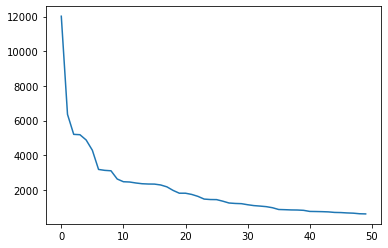

In [62]:
# Zipf의 법칙
# 빈도수는 1/2정도 줄어든다
import matplotlib.pyplot as plt

plt.plot(list(map(lambda t: t[1], text.vocab().most_common(50))))

In [64]:
text.vocab().most_common(1)

[(',', 12016)]

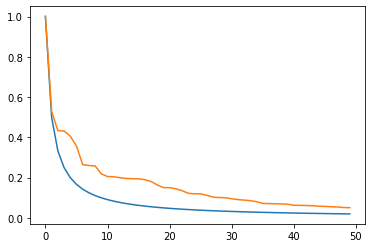

In [68]:
plt.plot(list(map(lambda n: 1/n, range(1, 51))))
plt.plot(list(map(lambda t: t[1]/12000, text.vocab().most_common(50))))

In [55]:
# collection의 counter와 비슷하다
type(text.vocab())

nltk.probability.FreqDist

In [ ]:
text.collec

In [57]:
text.concordance('emma')

Displaying 25 of 855 matches:
[ emma by jane austen 1816 ] volum i chapte
jane austen 1816 ] volum i chapter i emma woodhous , handsom , clever , and ri
 both daughter , but particularli of emma . between _them_ it wa more the inti
 and friend veri mutual attach , and emma do just what she like ; highli estee
 her own . the real evil , inde , of emma 's situat were the power of have rat
wedding-day of thi belov friend that emma first sat in mourn thought of ani co
 go onli half a mile from them ; but emma wa awar that great must be the diffe
day . it wa a melancholi chang ; and emma could not but sigh over it , and wis
 the rest of her life at hartfield . emma smile and chat as cheer as she could
 abl to tell her how we all are . '' emma spare no exert to maintain thi happi
 ' i have a great regard for you and emma ; but when it come to the question o
fanci , troublesom creatur ! '' said emma play . `` that is what you have in y
the few peopl who could see fault in emma woodhous , and 

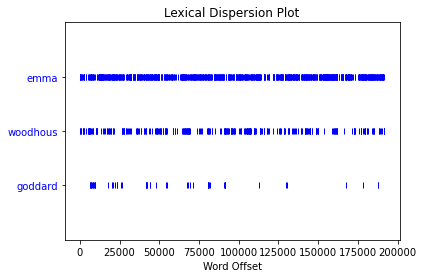

In [58]:
text.dispersion_plot(['emma', 'woodhous', 'goddard'])

In [56]:
from collections import Counter

In [69]:
# 영어 -> token + stemming + lemmatization -> pos + stopwords
from nltk.tag import pos_tag

In [72]:
pos_tag(word_tokenize(sent_tokenize(corpus_2)[1]))

[('She', 'PRP'),
 ('was', 'VBD'),
 ('the', 'DT'),
 ('youngest', 'JJS'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('two', 'CD'),
 ('daughters', 'NNS'),
 ('of', 'IN'),
 ('a', 'DT'),
 ('most', 'RBS'),
 ('affectionate', 'JJ'),
 (',', ','),
 ('indulgent', 'JJ'),
 ('father', 'NN'),
 (';', ':'),
 ('and', 'CC'),
 ('had', 'VBD'),
 (',', ','),
 ('in', 'IN'),
 ('consequence', 'NN'),
 ('of', 'IN'),
 ('her', 'PRP$'),
 ('sister', 'NN'),
 ("'s", 'POS'),
 ('marriage', 'NN'),
 (',', ','),
 ('been', 'VBN'),
 ('mistress', 'NN'),
 ('of', 'IN'),
 ('his', 'PRP$'),
 ('house', 'NN'),
 ('from', 'IN'),
 ('a', 'DT'),
 ('very', 'RB'),
 ('early', 'JJ'),
 ('period', 'NN'),
 ('.', '.')]

In [73]:
upenn_tagset('PRP')

PRP: pronoun, personal
    hers herself him himself hisself it itself me myself one oneself ours
    ourselves ownself self she thee theirs them themselves they thou thy us


In [75]:
pos_tag(word_tokenize(corpus_2))[:10]

[('[', 'NNS'),
 ('Emma', 'NNP'),
 ('by', 'IN'),
 ('Jane', 'NNP'),
 ('Austen', 'NNP'),
 ('1816', 'CD'),
 (']', 'NNP'),
 ('VOLUME', 'NNP'),
 ('I', 'PRP'),
 ('CHAPTER', 'VBP')]

In [76]:
text2 = Text(list(map(lambda t: t[0], pos_tag(word_tokenize(corpus_2)))))

In [80]:
text2.vocab().most_common(10)

[(',', 12016),
 ('.', 6355),
 ('to', 5125),
 ('the', 4844),
 ('and', 4653),
 ('of', 4272),
 ('I', 3177),
 ('--', 3100),
 ('a', 3001),
 ("''", 2452)]

In [81]:
list(zip(text.vocab().most_common(10), text2.vocab().most_common(11)))

[((',', 12016), (',', 12016)),
 (('.', 6355), ('.', 6355)),
 (('the', 5201), ('to', 5125)),
 (('to', 5181), ('the', 4844)),
 (('and', 4877), ('and', 4653)),
 (('of', 4284), ('of', 4272)),
 (('i', 3177), ('I', 3177)),
 (('a', 3124), ('--', 3100)),
 (('--', 3100), ('a', 3001)),
 (('it', 2625), ("''", 2452))]

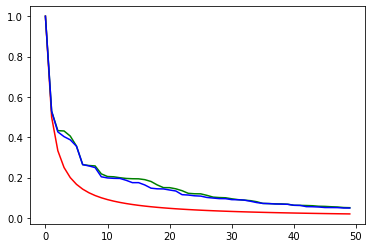

In [82]:
plt.plot(list(map(lambda n: 1/n, range(1, 51))), 'r-')
plt.plot(list(map(lambda t: t[1]/12016, text.vocab().most_common(50))), 'g-')
plt.plot(list(map(lambda t: t[1]/12016, text2.vocab().most_common(50))), 'b-')

In [ ]:
list

In [ ]:
sent(ngrams)

In [83]:
from konlpy.tag import Okt
Okt.pos('아버지가 방에 들어가신다.')

ModuleNotFoundError: No module named 'konlpy'